### MDSI Advanced Machine Learning Applications

Student: Ivan Cheung

Assignment: Kaggle 1


GitHub repo: https://github.com/ivanutsmdsi/amla2023

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder   ## for normalising the feature data
from sklearn.model_selection import train_test_split              ## making test/train splits, for producing AUROC score?
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as mp
import seaborn as sb
from joblib import dump

In [63]:
nba_train = pd.read_csv('../data/raw/train.csv')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_32536\2272104194.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  nba_train = pd.read_csv('../data/raw/train.csv')


In [4]:
nba_train.head(10)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0
5,Butler,Horz,6,0.7,0.0,0.0,0.0,0.00,0.0,26.3,...,3.744910,0.0000,0.3333,0.3333,0.3333,0.0000,0.0000,0.0000,b2e55b6e-378f-47fd-8f87-6eaa5017fbfe,0.0
6,Longwood,ind,27,77.8,104.8,23.0,53.4,56.30,6.8,14.5,...,-0.908391,2.1481,3.8889,6.0370,1.8148,1.7778,0.7407,15.2593,d2107e36-c138-44cd-b31f-ef2b30a2c84e,0.0
7,Fordham,A10,19,10.4,131.9,3.3,90.0,90.00,2.6,3.2,...,-2.086900,0.1579,0.1579,0.3158,0.1053,0.1053,0.0000,0.4737,796395e7-256e-4ab8-911b-944f287f64dc,0.0
8,Wagner,NEC,30,82.8,99.7,20.5,48.8,53.07,2.9,13.9,...,0.919272,0.8000,3.9333,4.7333,4.1333,1.7333,0.8000,10.5000,9416f499-bb4a-41ba-af0f-7cacfadb677c,0.0
9,Wagner,NEC,30,80.4,92.5,23.0,43.5,45.29,6.4,12.6,...,-1.913070,1.7333,3.4667,5.2000,1.7333,1.2333,0.1000,11.8667,74913834-bae8-4574-9c48-9fe0c75b4ddc,0.0


In [30]:
## columns to drop:
# team / conf - descriptive details about players (their conference and their team) will not  be used as a feature
# ftr - no description given, removed from feature analysis
# yr - player year details are descriptive, need to vectorise in future modelling
# ht - player height data has been corrupted
# num - payer number not relevant as a feature
# pfr - no description given, removed from feature analysis
# type - metadata field not relevant as a feature
# year - no longitudinal inclusion for feature modeling
# drafted - remove the target column in the training data
# player_id - remove player_id, matching to player id in training data not required


df = nba_train.drop(["drafted", "player_id", "team", "conf", "ht", "yr", "num", "type" ,"year", "ftr", "pfr"], axis = 1)

target = nba_train.pop("drafted")

In [5]:
df.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758


In [6]:
cor_matrix = df.corr().abs() 

print(cor_matrix)

                           GP   Min_per      Ortg       usg       eFG  \
GP                   1.000000  0.780850  0.443309  0.193908  0.416546   
Min_per              0.780850  1.000000  0.398857  0.349819  0.346221   
Ortg                 0.443309  0.398857  1.000000  0.165410  0.784157   
usg                  0.193908  0.349819  0.165410  1.000000  0.160583   
eFG                  0.416546  0.346221  0.784157  0.160583  1.000000   
TS_per               0.434722  0.379121  0.849692  0.205958  0.934169   
ORB_per              0.005510  0.051825  0.118376  0.087382  0.034630   
DRB_per              0.037280  0.033872  0.043333  0.092843  0.057518   
AST_per              0.193153  0.335007  0.180594  0.281739  0.074258   
TO_per               0.044621  0.119816  0.285193  0.080861  0.062752   
FTM                  0.576459  0.808915  0.332703  0.496826  0.253218   
FTA                  0.602241  0.816421  0.330062  0.498041  0.267156   
FT_per               0.596994  0.550687  0.477205  

In [7]:
type(cor_matrix)

pandas.core.frame.DataFrame

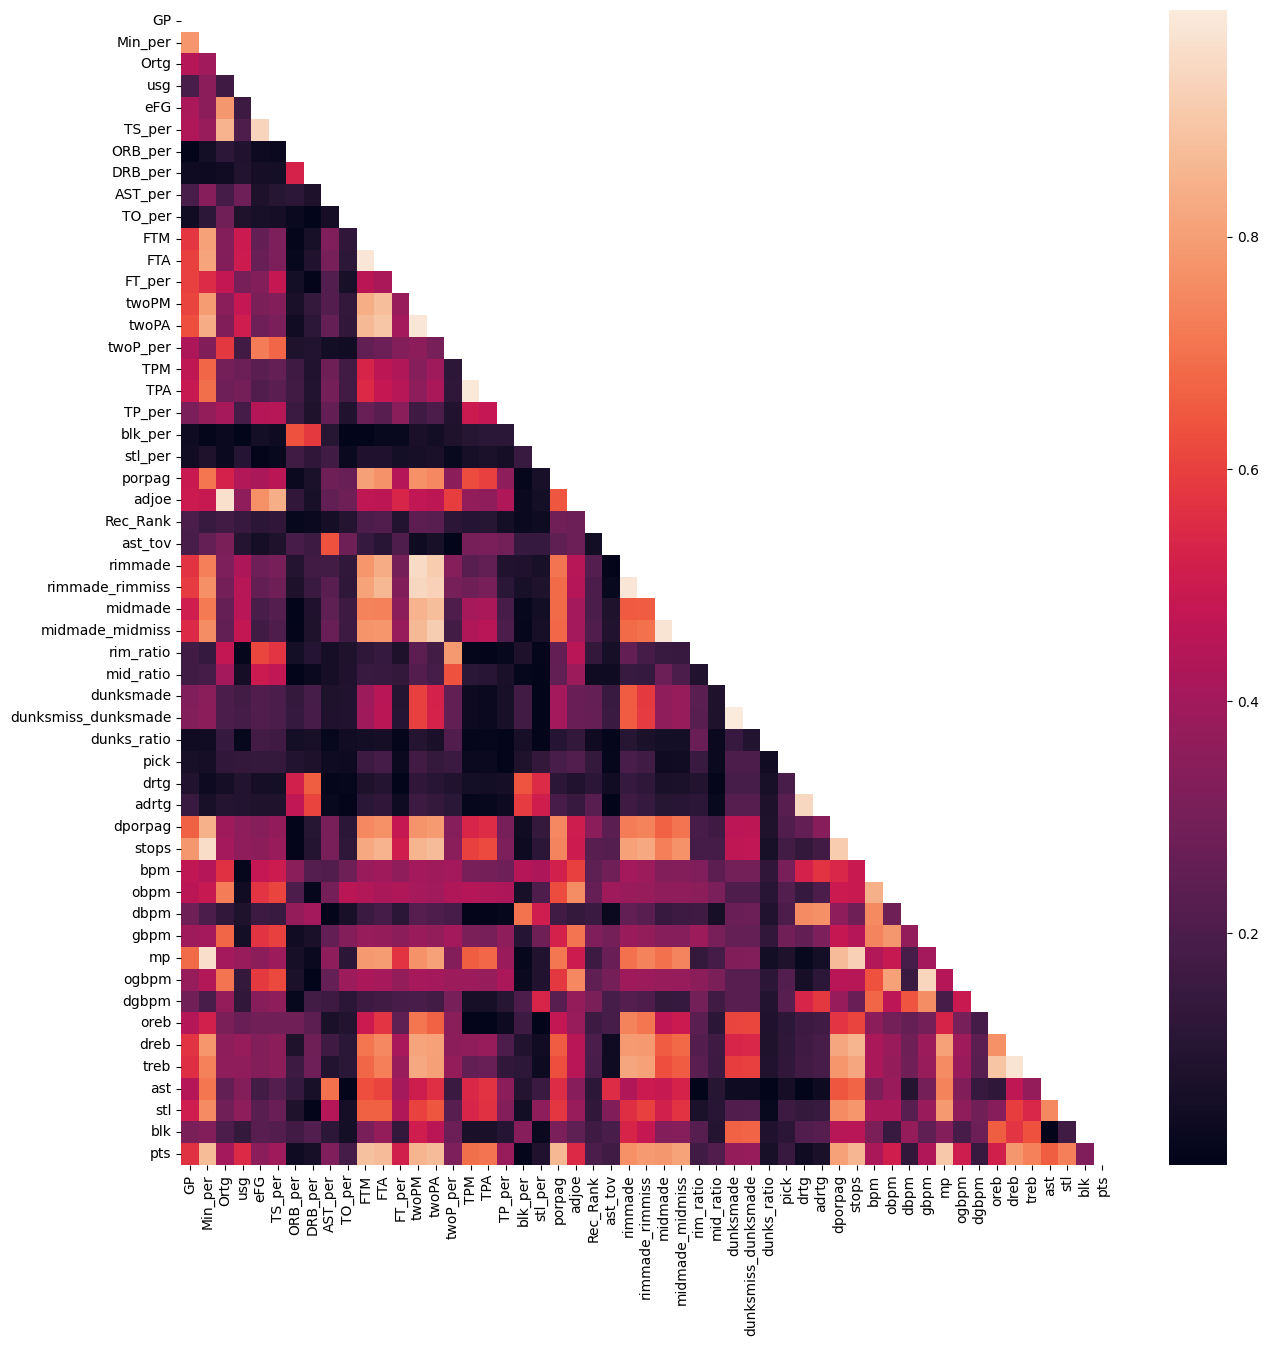

In [24]:
mp.subplots(figsize = (15,15))

# creating mask
# this mask makes it so the heatmap will only show one half of the array
# for the correlation matrix, the values are duplicated (top and bottom) so only one half of the array needs to be visualised.
mask = np.triu(np.ones_like(cor_matrix))

# plotting correlation heatmap
dataplot=sb.heatmap(cor_matrix, mask=mask)

# displaying heatmap
mp.show()

**Identifying columns with high correlation**

Use the heatmap to identify columns with high correlation with each other. Target correlation score = Above 0.9

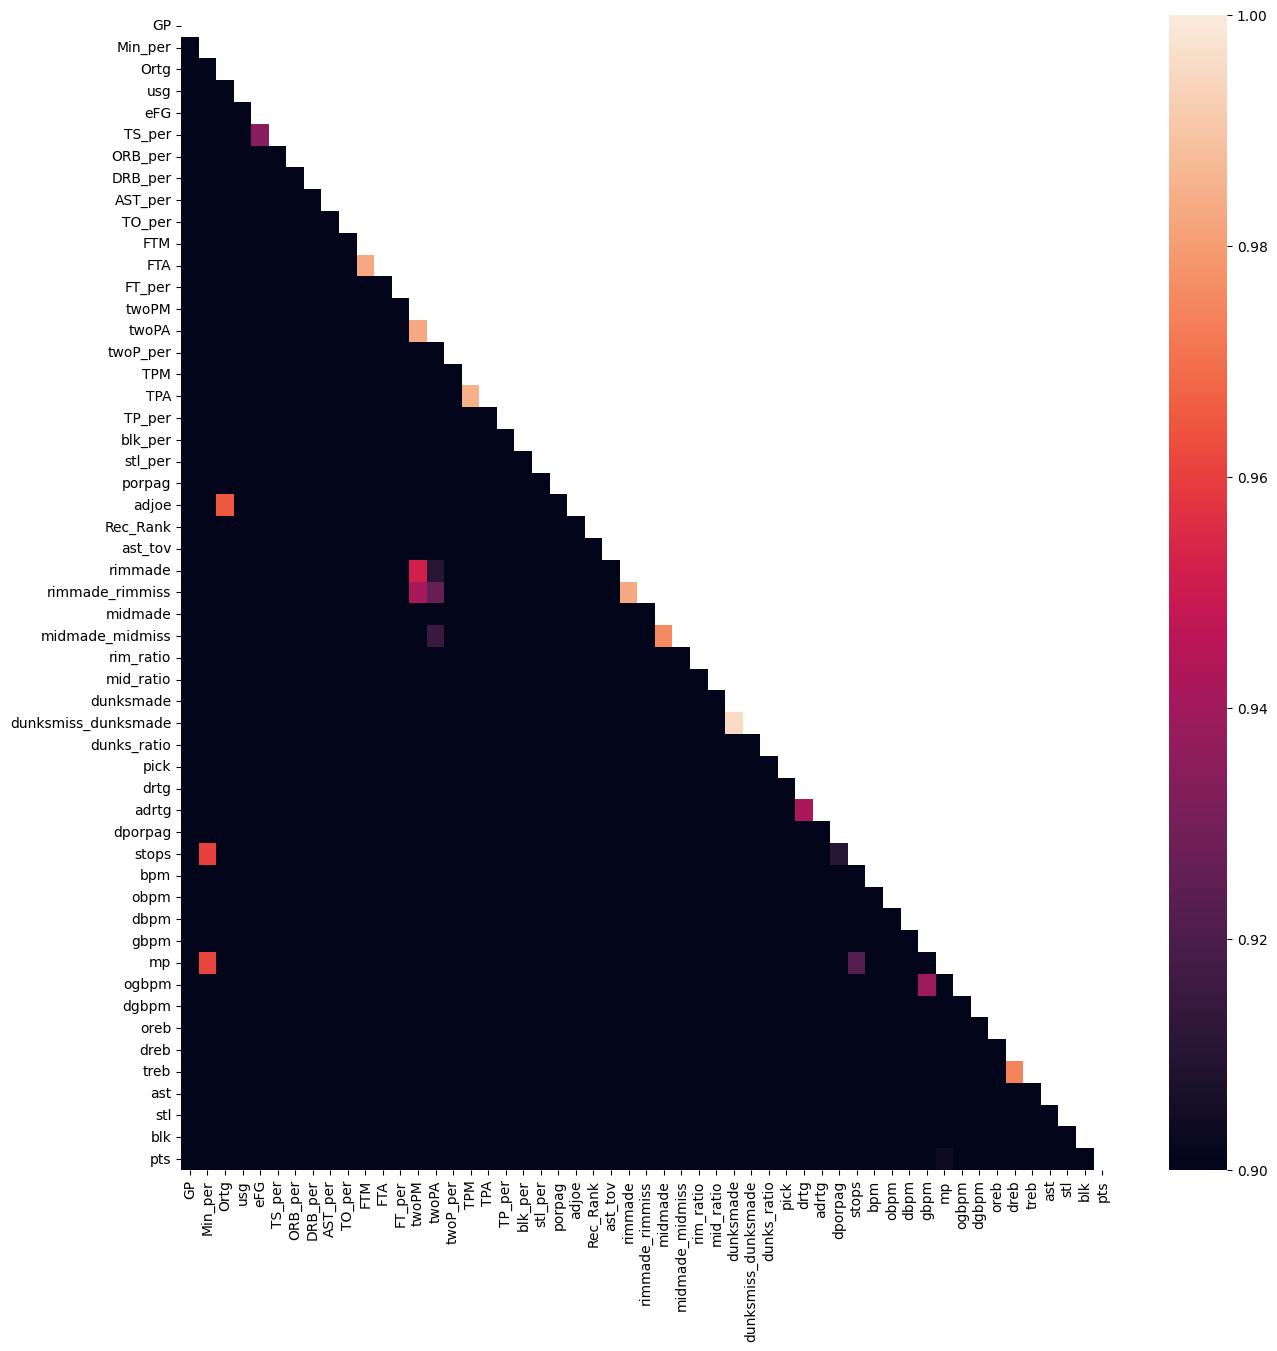

In [30]:
mp.subplots(figsize = (15,15))

# plotting correlation heatmap
# in this heatmap, change the vmax and vmin to only show 0.9 - 1.0
dataplot=sb.heatmap(cor_matrix, mask=mask, vmin=0.9, vmax = 1.0)

# displaying heatmap
mp.show()

**Highly correlated columns:**

Min_per > mp, stops

Ortg > adjoe

eFG > TS_per

FTM > FTA

twoPM > rimmade_rimmiss, rimmade, twoPA

twoPA > midmade_midmiss, rimmade_rimmiss, rimmade

TPM > TPA

rimmade > rimmade_rimmiss

midmade > midmade_midmiss

dunksmade > dunksmiss_dunksmade

drtg > adrtg

dporpag > stops

stops > mp

gbpm > ogbpm

dreb > treb

**columns to exclude from regression modelling, and reasons why**

ORtg (Offensive Rating) vs. adjoe (adjusted offensive efficency): These two values present the same statistic in different ways.

eFG (Effective Field Goal Perc) vs. TS_per (True shot perc):

FTM (Free Throws Made) vs. FTA (Free Throw Attempted):



In [25]:
s = df.isnull().any()

## check if there is null values in any column
print(s.where(s == True).dropna())

print("number of columns with empty values: " , str(s.where(s == True).dropna().count()))

Rec_Rank               True
ast_tov                True
rimmade                True
rimmade_rimmiss        True
midmade                True
midmade_midmiss        True
rim_ratio              True
mid_ratio              True
dunksmade              True
dunksmiss_dunksmade    True
dunks_ratio            True
pick                   True
drtg                   True
adrtg                  True
dporpag                True
stops                  True
bpm                    True
obpm                   True
dbpm                   True
gbpm                   True
mp                     True
ogbpm                  True
dgbpm                  True
oreb                   True
dreb                   True
treb                   True
ast                    True
stl                    True
blk                    True
pts                    True
dtype: object
number of columns with empty values:  30


In [31]:
## because 30 columns have null values, replace nulls with 0

df = df.fillna(0)

In [32]:
## Preprocessing for regression:

## Scaling - normalise the range of variables
sc = StandardScaler()
df = sc.fit_transform(df)

In [33]:
## saving the scaler into models folder.

dump(sc, '../models/scaler.joblib')

['../models/scaler.joblib']

In [34]:
## splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=8)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44872, 53)
(11219, 53)
(44872,)
(11219,)


In [36]:
X_train.tofile('../data/processed/X_train.csv')
X_test.tofile('../data/processed/X_test.csv')
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [38]:
## Perform Logistic Regression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
dump(classifier, '../models/logistic_regression_1.joblib')

['../models/logistic_regression_1.joblib']

In [39]:
y_pred = classifier.predict(X_test)

In [46]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
cf_matrix

array([[11113,    26],
       [   39,    41]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

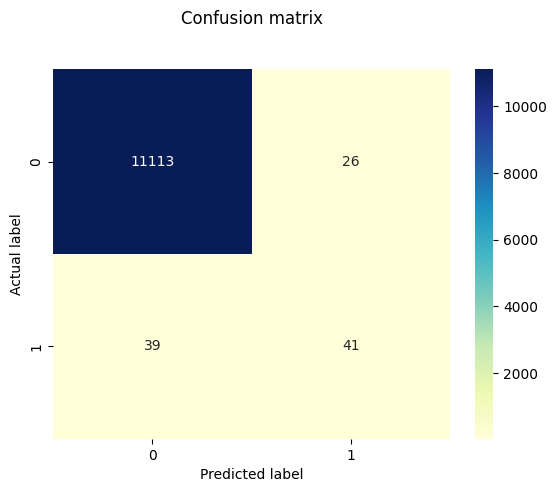

In [48]:
sb.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
mp.title('Confusion matrix', y=1.1)
mp.ylabel('Actual label')
mp.xlabel('Predicted label')

In [40]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
42482,0.0,0.0
37581,0.0,0.0
44691,0.0,0.0
30358,0.0,0.0
13461,0.0,0.0
...,...,...
28603,0.0,0.0
31211,0.0,0.0
30032,0.0,0.0
39419,0.0,0.0


In [69]:
pred_proba = classifier.predict_proba(X_test)

In [71]:
pred_proba[:,1]

array([3.79384525e-04, 8.06118320e-04, 1.38954961e-03, ...,
       2.25217818e-08, 1.46029672e-06, 9.05222608e-07])

### Applying regression model to test data####

In [111]:
## load data
nba_test = pd.read_csv('../data/raw/test.csv')

## pop player ID out
test_player_id = nba_test.pop('player_id').to_frame()

#remove cols not being tested
nba_test = nba_test.drop(["team", "conf", "ht", "yr", "num", "type" ,"year", "ftr", "pfr"], axis = 1)

In [100]:
## Preprocessing:

# 1) fillna
nba_test = nba_test.fillna(0)

# 2) normalise values
test_clean = sc.fit_transform(nba_test)

In [102]:
## predict values
test_pred = classifier.predict_proba(test_clean)

In [106]:
test_pred_drafted = np.round(test_pred[:, 1], 2)

In [112]:
test_player_id['drafted'] = test_pred_drafted.tolist()

In [116]:
test_player_id.to_csv('../data/processed/submission.csv', index=False)